# Problem Statement
 This project involves deploying an insurance premium prediction model that analyzes various health and demographic factors to forecast the likely insurance premium for individuals.

Using key features such as age, diabetes status, blood pressure issues, history of transplants, chronic diseases, height, weight, known allergies, family cancer history, and number of major surgeries, the model assesses health-related risks to estimate an appropriate premium price.

This approach aims to assist insurers in more accurately determining costs based on individual risk profiles, making premium pricing more data-driven and tailored

# Objective

* Enhance Pricing Accuracy: Provide a data-driven approach to premium pricing, enabling insurers to set fair and competitive rates based on individual risk factors.

* Support Risk Assessment: Assist insurance providers in evaluating the health risk profile of applicants, leading to more tailored insurance offerings and better-informed underwriting decisions.

* Improve Customer Insights: Help users understand how specific health attributes impact their insurance premiums, encouraging healthier lifestyle choices

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [105]:
raw_data = pd.read_csv("insurance.csv")

In [106]:
raw_data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [107]:
raw_data.drop_duplicates()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [108]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [109]:
for column in raw_data.columns:
    print("="*100,"\n")
    print(f"No of Unique values in {column} : {raw_data[column].nunique()}\n")
    print("="*100,"\n")


No of Unique values in Age : 49



No of Unique values in Diabetes : 2



No of Unique values in BloodPressureProblems : 2



No of Unique values in AnyTransplants : 2



No of Unique values in AnyChronicDiseases : 2



No of Unique values in Height : 44



No of Unique values in Weight : 74



No of Unique values in KnownAllergies : 2



No of Unique values in HistoryOfCancerInFamily : 2



No of Unique values in NumberOfMajorSurgeries : 4



No of Unique values in PremiumPrice : 24




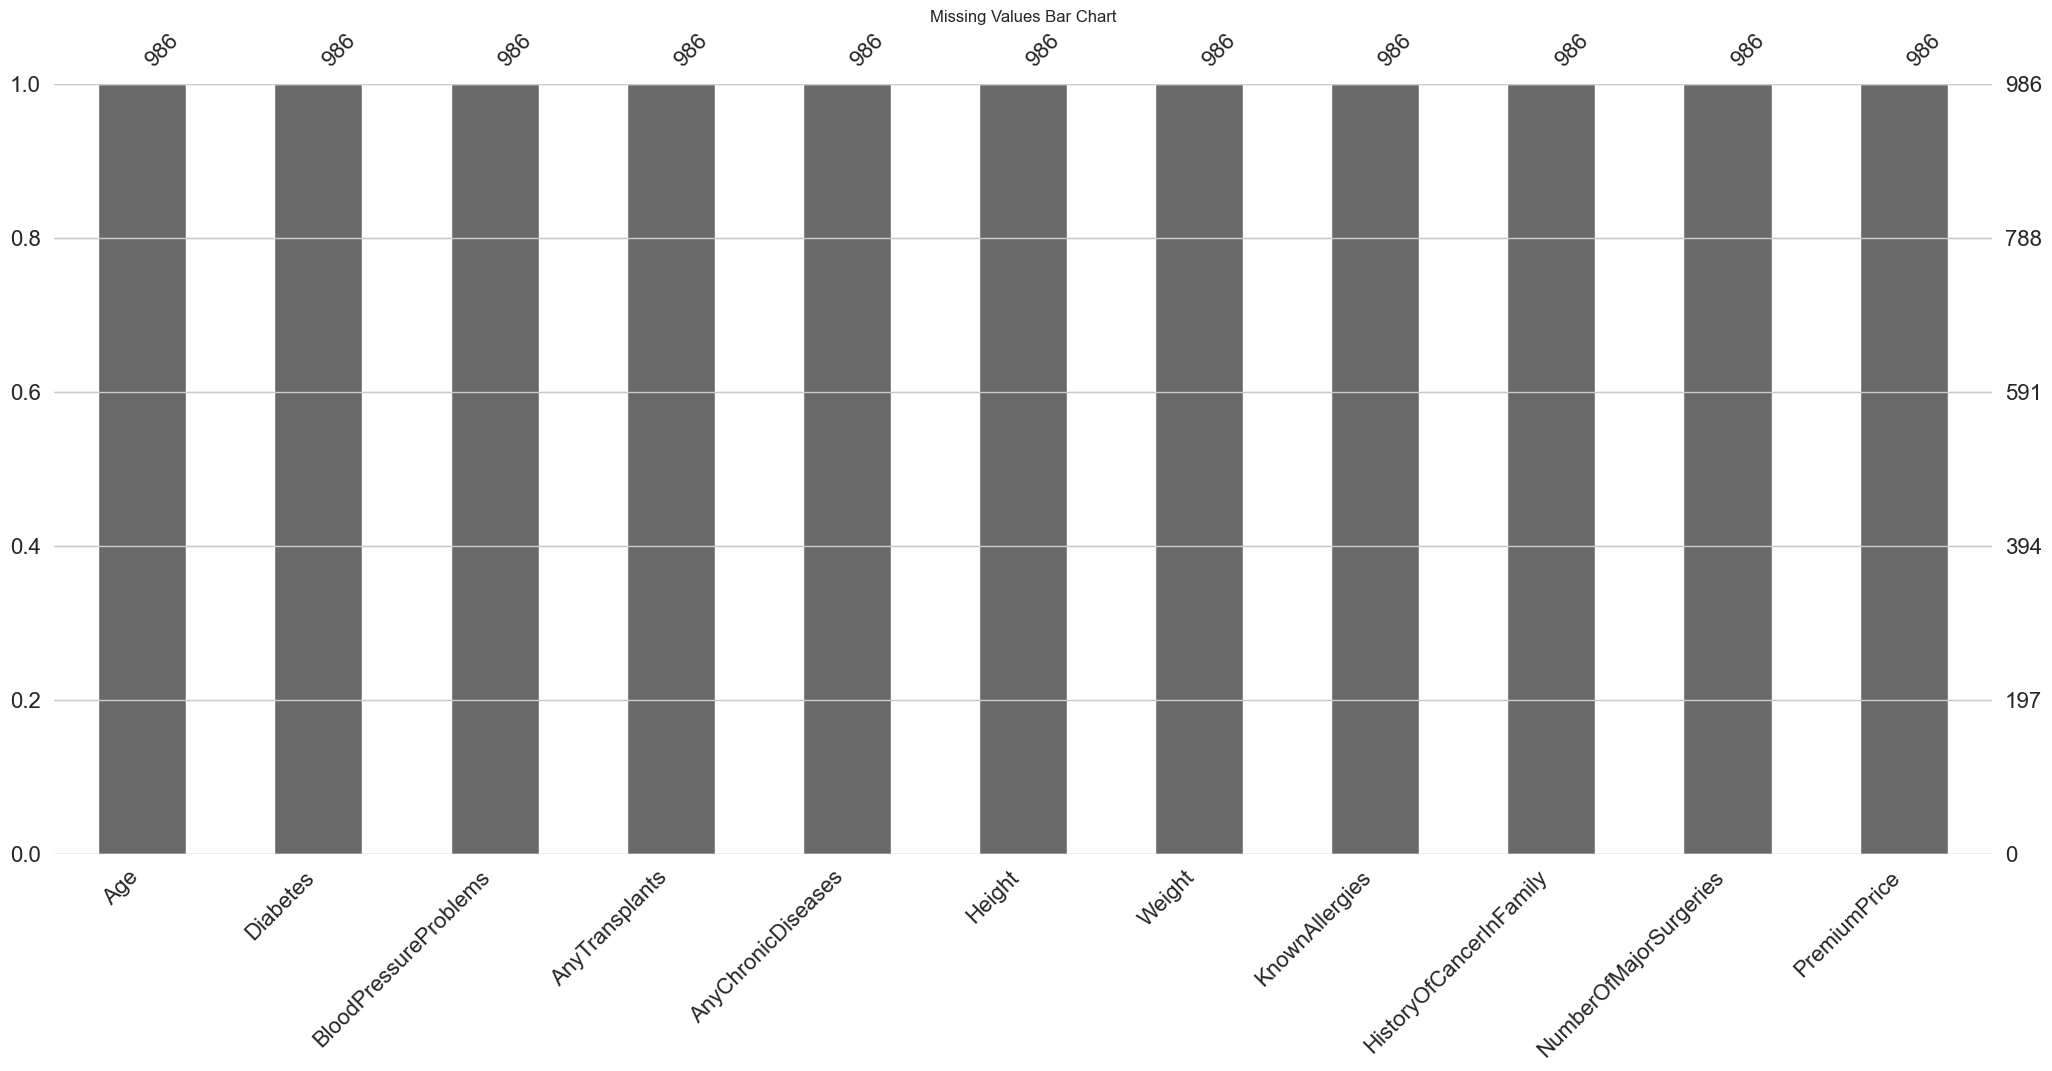

In [110]:
import missingno as msno
msno.bar(raw_data)
plt.title('Missing Values Bar Chart')
plt.show()

* Most of the features in the dataset are Numeric although some categorical features are there.
* Henece it can be seen that there's some mismatch in the datatypes of features as all features have integer datatype.
* There are not null values in the dataset.

## Statistical Summary of The Data

In [111]:
raw_data.describe().round(2)

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.00,986.00,986.00,986.00,986.00,986.00,986.00,986.00,986.00,986.00,986.00
mean,41.75,0.42,0.47,0.06,0.18,168.18,76.95,0.22,0.12,0.67,24336.71
std,13.96,0.49,0.50,0.23,0.38,10.10,14.27,0.41,0.32,0.75,6248.18
min,18.00,0.00,0.00,0.00,0.00,145.00,51.00,0.00,0.00,0.00,15000.00
25%,30.00,0.00,0.00,0.00,0.00,161.00,67.00,0.00,0.00,0.00,21000.00
50%,42.00,0.00,0.00,0.00,0.00,168.00,75.00,0.00,0.00,1.00,23000.00
75%,53.00,1.00,1.00,0.00,0.00,176.00,87.00,0.00,0.00,1.00,28000.00
max,66.00,1.00,1.00,1.00,1.00,188.00,132.00,1.00,1.00,3.00,40000.00


1. Age:
    * Mean Age is around 42 years.
    * Mean of Age is lesser than its Median which shows Left-Skewness in the distribution.

2. Height:
    * Mean Height is 168.18 cm.
    * Mean Height is almost Equals to Median height,there is possiblity of Normal Distribution.

3. Weight:
    * Mean Weight is 76.95 Kg.
    * Mean Weight is almost equals to Median weight.

4. Premium Price:
    * Average Premium Price is 24336.71 Rs.
    * Mean Premium Price is greater than that of Median which shows right skewness.

## Univariate Analysis

### Numeric Columns

#### 1. Age

#### Age Distribution

In [112]:
raw_data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

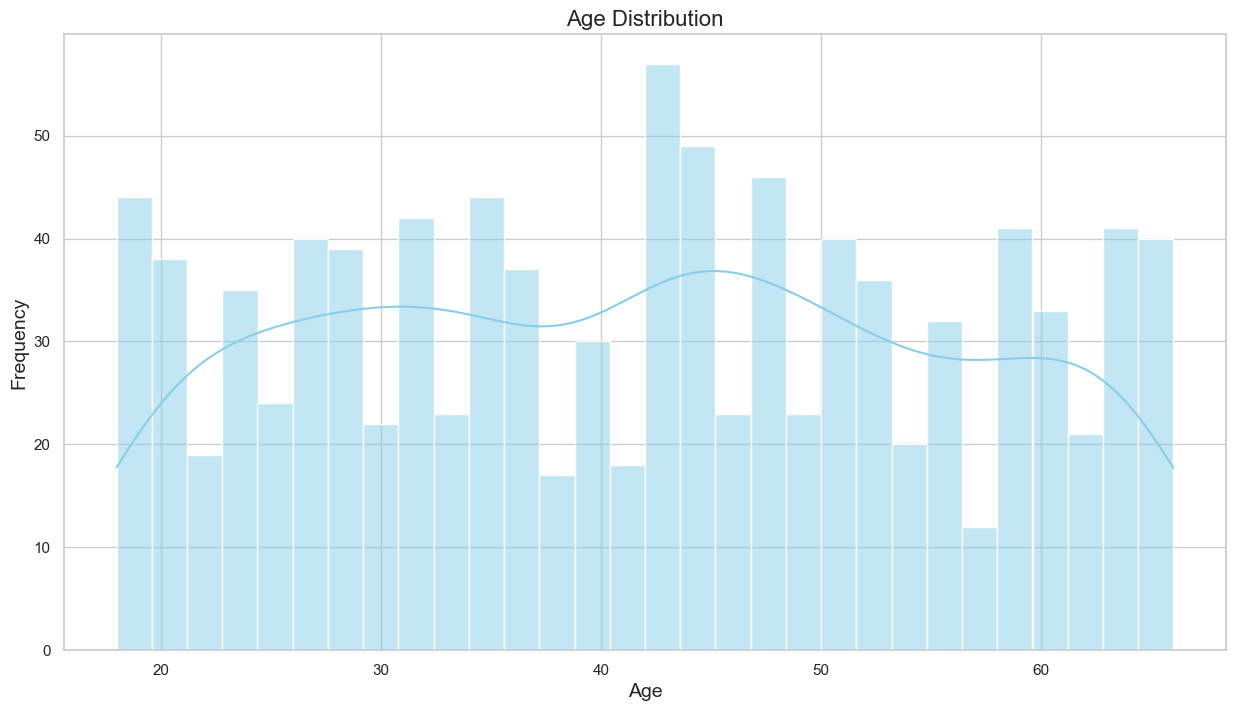

In [113]:
plt.figure(figsize=(15, 8))
sns.histplot(raw_data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

* Age doesn't follow any particular distribution.

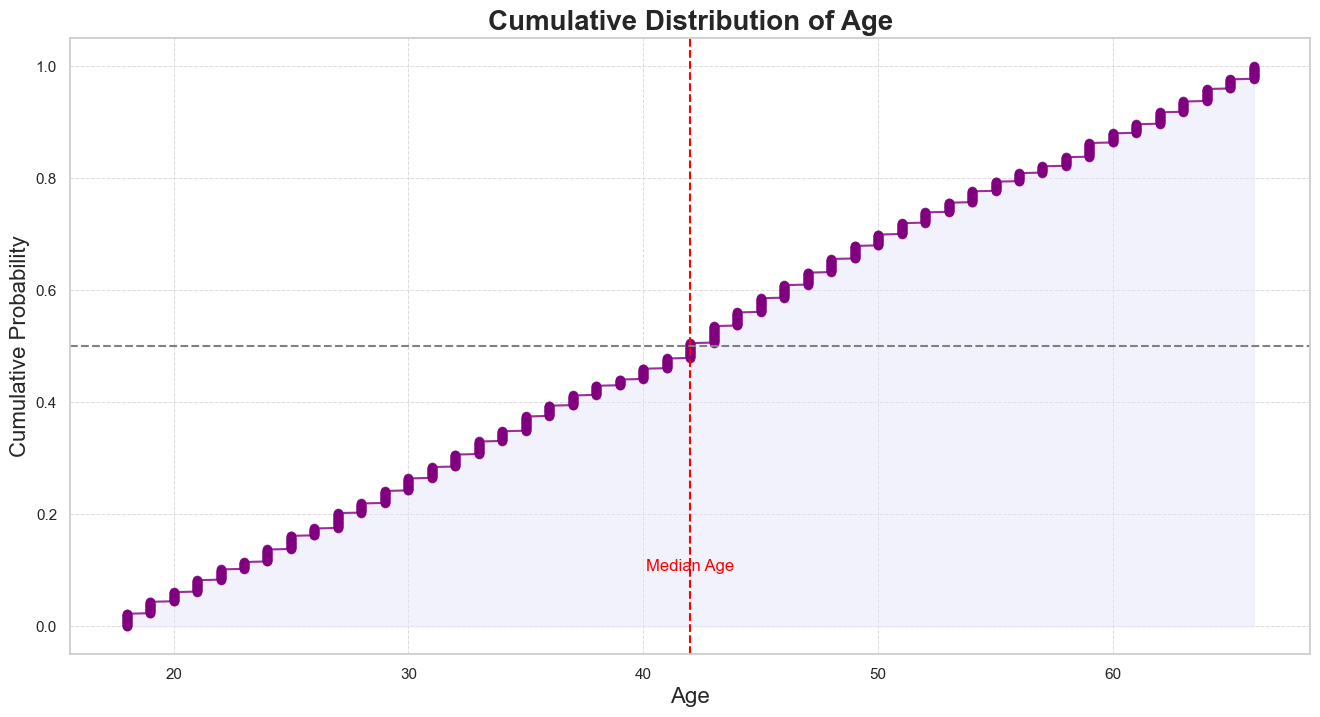

In [114]:
age_sorted = np.sort(raw_data['Age'])

# Calculate the cumulative probabilities
p = 1. * np.arange(len(age_sorted)) / (len(age_sorted) - 1)
plt.figure(figsize=(16, 8))
plt.plot(age_sorted, p, marker='o', linestyle='-', color='purple', markersize=6, alpha=0.8)

# Customize plot
plt.title('Cumulative Distribution of Age', fontsize=20, fontweight='bold')
plt.xlabel('Age', fontsize=16)
plt.ylabel('Cumulative Probability', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# Add annotations
plt.axhline(y=0.5, color='grey', linestyle='--')
plt.axvline(x=np.median(raw_data['Age']), color='red', linestyle='--')
plt.text(np.median(raw_data['Age']), 0.1, 'Median Age', fontsize=12, color='red', ha='center')
plt.fill_between(age_sorted, 0, p, color='lavender', alpha=0.5)

plt.show()

* 40% People are below 35 years of age.
* Maximum age is 66 years.

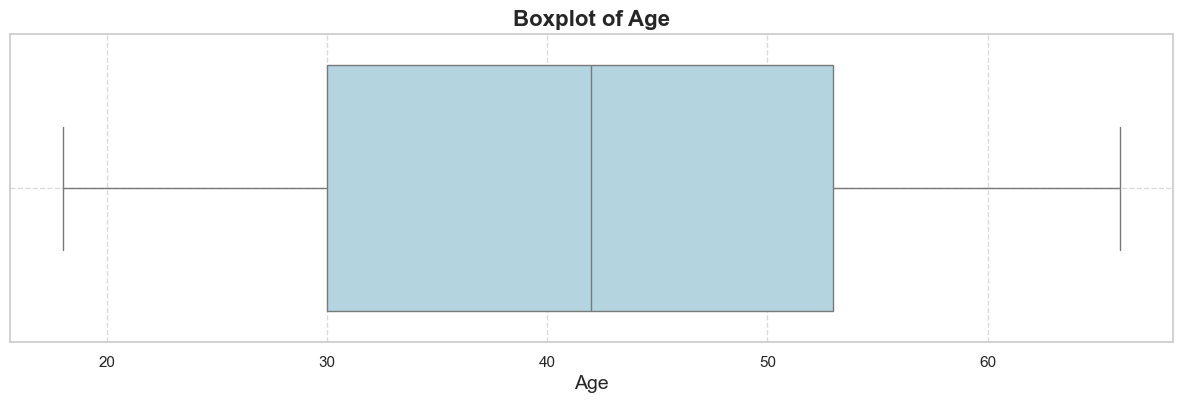

In [115]:
# Set up the figure size and style
plt.figure(figsize=(15, 4))
sns.set(style="whitegrid")

# Create a boxplot for the Age column
sns.boxplot(x=raw_data['Age'], color='lightblue')

# Customize the plot
plt.title('Boxplot of Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

* No presence of Outlier in Age Feature.

### 2. Premium Price

#### Distribution of Premium Price

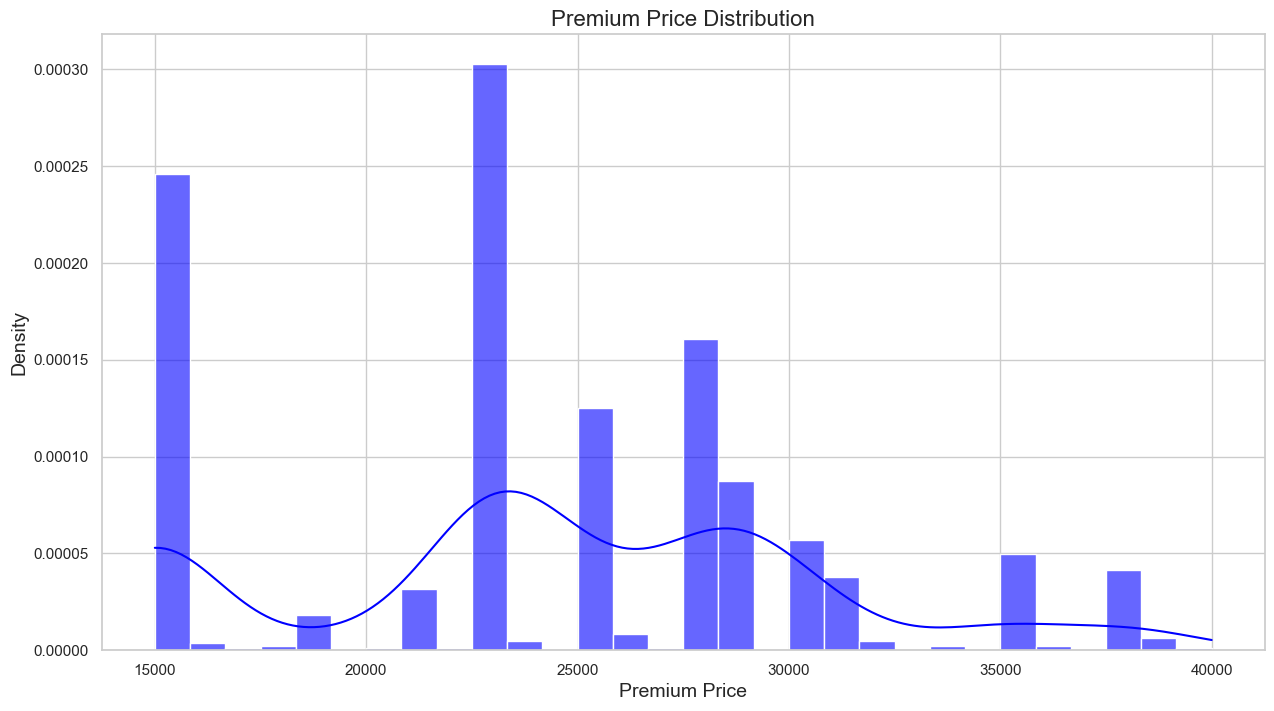

In [116]:
sns.set(style="whitegrid")

# Creating the histogram with KDE
plt.figure(figsize=(15, 8))
sns.histplot(raw_data['PremiumPrice'], kde=True, bins=30, color='blue', stat='density', alpha=0.6)


plt.title('Premium Price Distribution', fontsize=16)
plt.xlabel('Premium Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)

# Showing the plot
plt.show()

* From the above plot it can be inferred that more than one distribution are coexisting in this feature
* This shows dependancy of Premium Price on Other Features. 

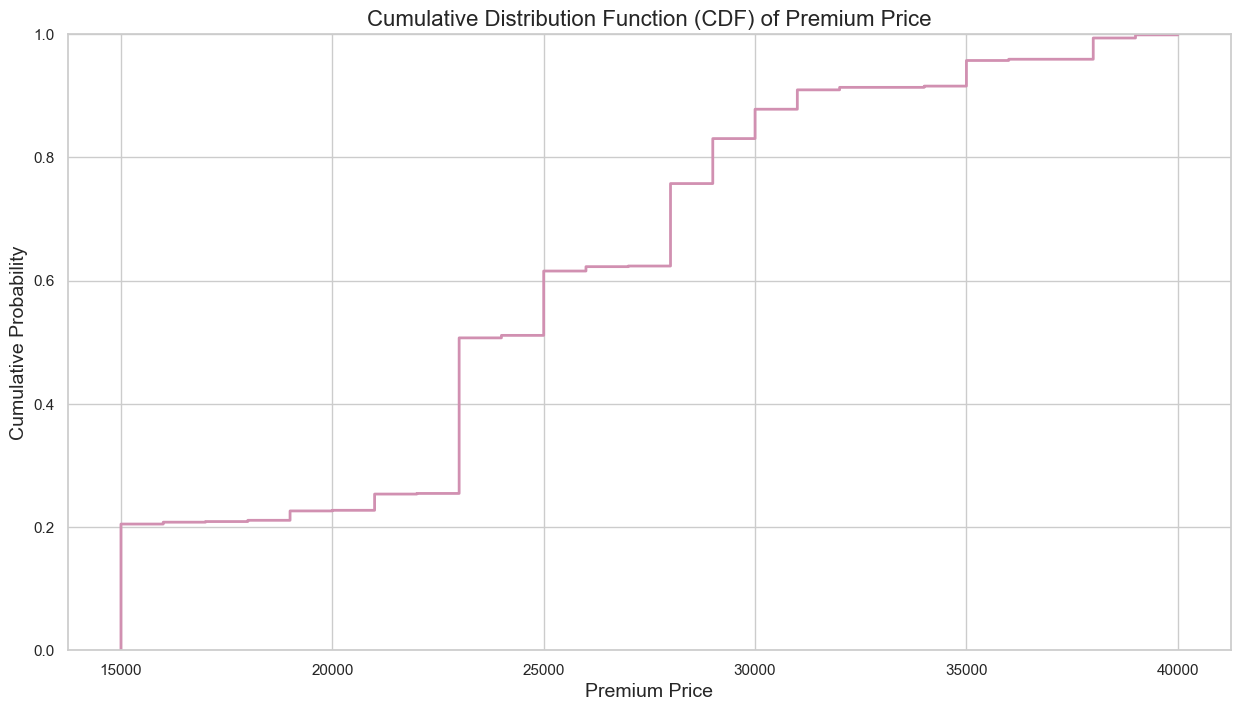

In [117]:
sns.set(style="whitegrid")


color = '#d190b1' 

# Creating CDF plot
plt.figure(figsize=(15, 8))
sns.ecdfplot(raw_data['PremiumPrice'], color=color, linewidth=2)

plt.title('Cumulative Distribution Function (CDF) of Premium Price', fontsize=16)
plt.xlabel('Premium Price', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.grid(True)

# Showing the plot
plt.show()

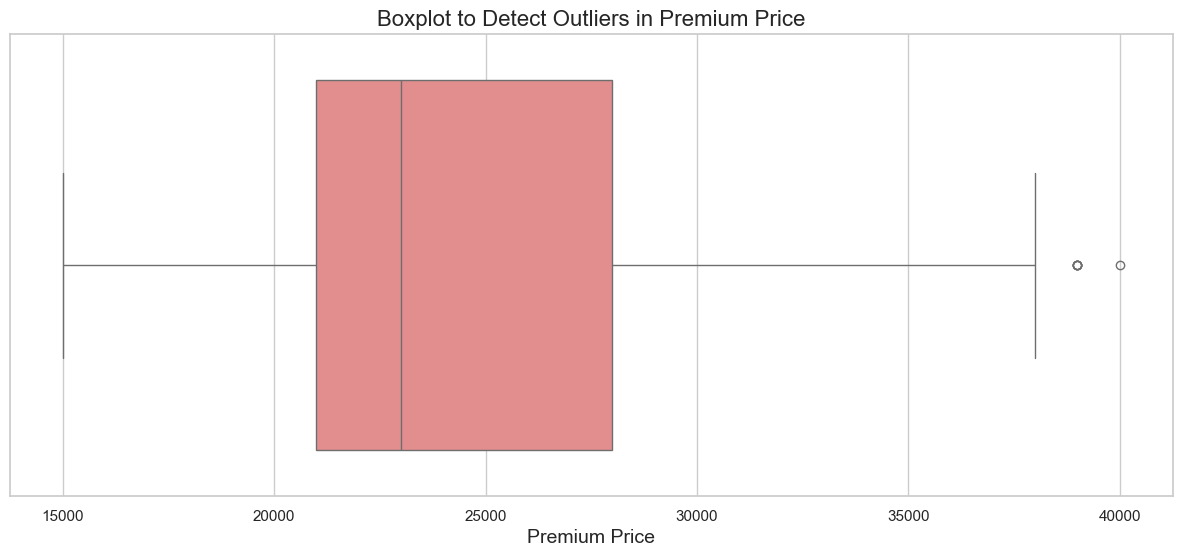

In [118]:
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(x=raw_data['PremiumPrice'], color='lightcoral')

# Customize the plot
plt.title('Boxplot to Detect Outliers in Premium Price', fontsize=16)
plt.xlabel('Premium Price', fontsize=14)

# Show plot
plt.show()

* No Outliers Present in the Premium Prices.

#### 3. Height

In [119]:
raw_data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

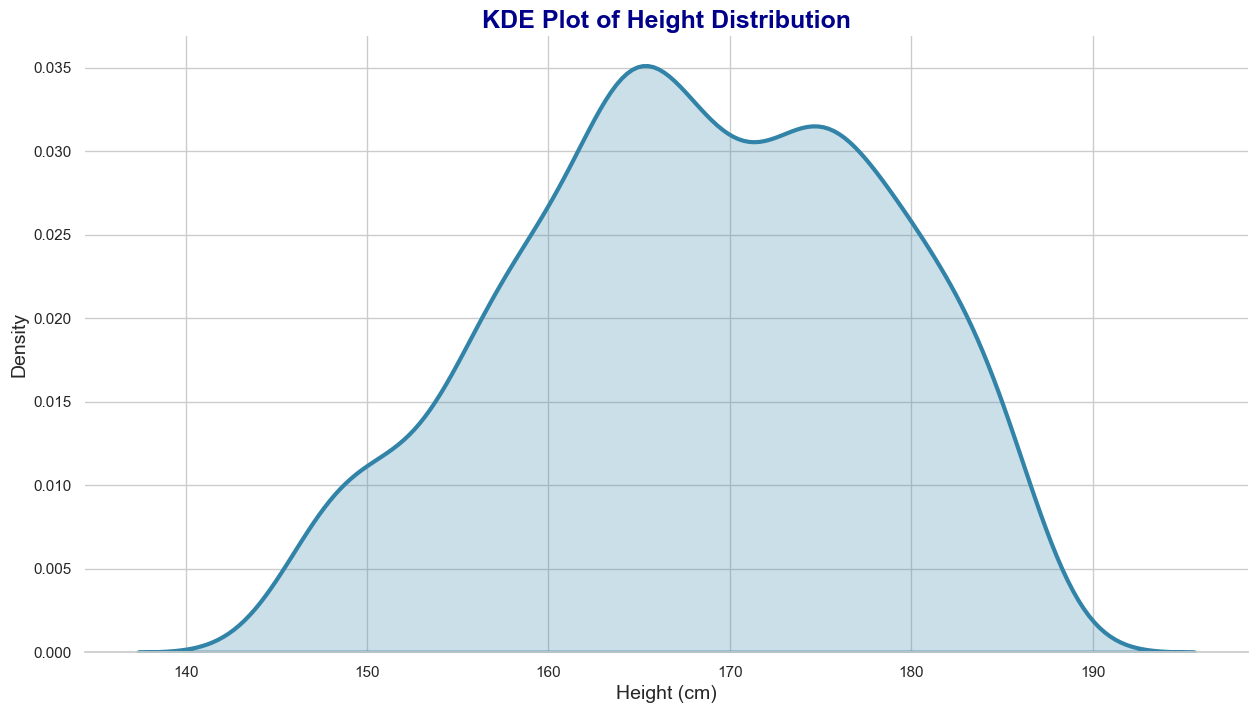

In [120]:
# Set the style for a fancy look
sns.set(style="whitegrid", palette="muted")

# Create a fancy KDE plot
plt.figure(figsize=(15, 8))  # Adjust the figure size
sns.kdeplot(raw_data['Height'], 
            shade=True,  # Fill the area under the curve
            color='#3283a8',  # Choose a nice color
            lw=3)  # Line width of the KDE plot

# Customize the plot for a fancy appearance
plt.title('KDE Plot of Height Distribution', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Height (cm)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Remove the spines to give it a cleaner look
sns.despine(left=True)

plt.show()

##### Shapiro-Wilk Test for Height Feature.
* H0 : The data does not follow Normal Distribution.
* Ha : The data follows Normal Distribution.

In [121]:
from scipy import stats

stat, p_value = stats.shapiro(raw_data['Height'])

print(f'Statistic: {stat}, p-value: {p_value}')

# Interpretation
alpha = 0.05  # 5% significance level
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")

Statistic: 0.9800269342061438, p-value: 2.2093408539983624e-10
The data does not follow a normal distribution (reject H0).


* Height Feature doesn't follow Normal Distribution.

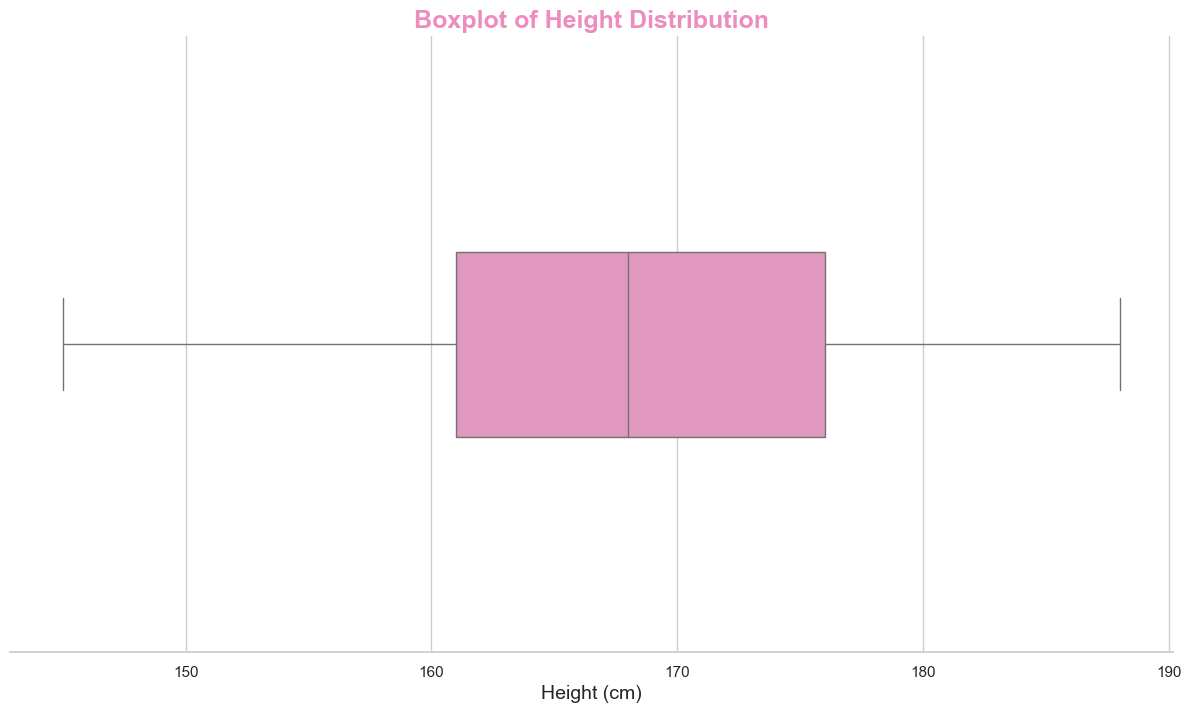

In [122]:
sns.set(style="whitegrid", palette="muted")


plt.figure(figsize=(15, 8))  
sns.boxplot(x=raw_data['Height'], color='#ed8cbe', width=0.3)  

plt.title('Boxplot of Height Distribution', fontsize=18, fontweight='bold', color='#ed8cbe')
plt.xlabel('Height (cm)', fontsize=14)

sns.despine(left=True)

plt.show()

* No Presence of Outliers.

### Weight

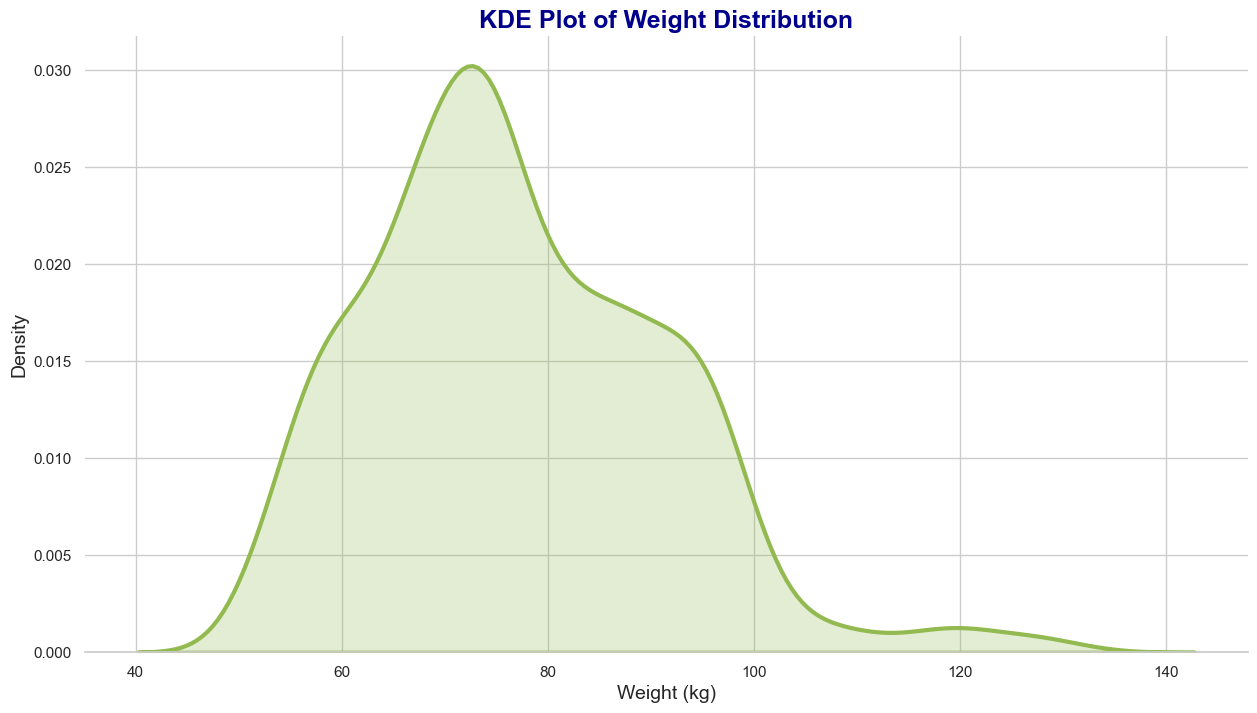

In [123]:
sns.set(style="whitegrid", palette="muted")

# Create a fancy KDE plot for Weight
plt.figure(figsize=(15, 8))  # Adjust the figure size
sns.kdeplot(raw_data['Weight'], 
            shade=True,  # Fill the area under the curve
            color='#93ba50',  # Choose the specified color
            lw=3)  # Line width of the KDE plot

# Customize the plot for a fancy appearance
plt.title('KDE Plot of Weight Distribution', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Weight (kg)', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Remove the spines to give it a cleaner look
sns.despine(left=True)

plt.show()

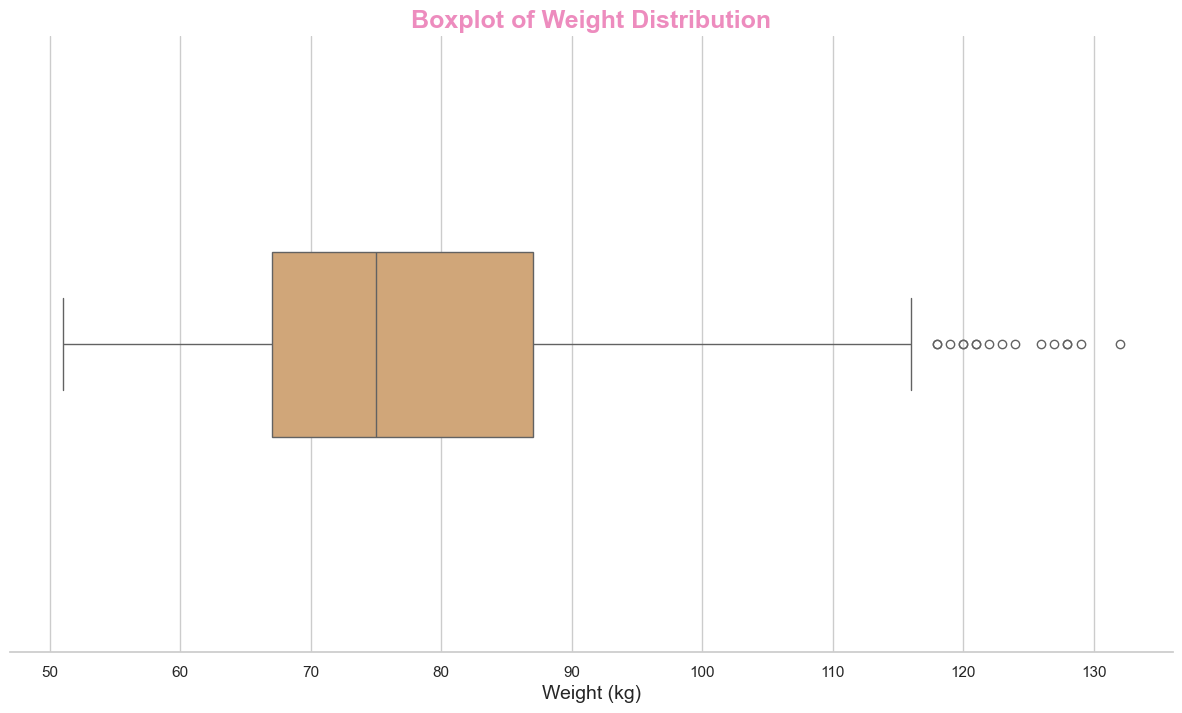

In [124]:
# Set the style for a fancy look
sns.set(style="whitegrid", palette="muted")

# Create a fancy boxplot for Weight
plt.figure(figsize=(15, 8))  
sns.boxplot(x=raw_data['Weight'], color='#dea66a', width=0.3)  

# Customize the plot for a fancy appearance
plt.title('Boxplot of Weight Distribution', fontsize=18, fontweight='bold', color='#ed8cbe')
plt.xlabel('Weight (kg)', fontsize=14)

# Remove the spines to give it a cleaner look
sns.despine(left=True)

plt.show()


## Categorical Features

In [125]:
data1 = raw_data.copy()

In [126]:
data1.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [127]:
# Define the mapping for each column
diabetes_mapping = {0: 'non-diabetic', 1: 'diabetic'}
bp_mapping = {0: 'no-blood-pressure-problems', 1: 'has-blood-pressure-problems'}
transplant_mapping = {0: 'no-transplant', 1: 'had-transplant'}
chronic_diseases_mapping = {0: 'no-chronic-disease', 1: 'has-chronic-disease'}
allergies_mapping = {0: 'no-allergies', 1: 'has-allergies'}
cancer_history_mapping = {0: 'no-cancer-history', 1: 'family-has-cancer-history'}

# Apply the mappings using the replace() method
data1['Diabetes'] = data1['Diabetes'].replace(diabetes_mapping)
data1['BloodPressureProblems'] = data1['BloodPressureProblems'].replace(bp_mapping)
data1['AnyTransplants'] = data1['AnyTransplants'].replace(transplant_mapping)
data1['AnyChronicDiseases'] = data1['AnyChronicDiseases'].replace(chronic_diseases_mapping)
data1['KnownAllergies'] = data1['KnownAllergies'].replace(allergies_mapping)
data1['HistoryOfCancerInFamily'] = data1['HistoryOfCancerInFamily'].replace(cancer_history_mapping)

# Check the first few rows to confirm the mapping is correct
data1.head()


,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,non-diabetic,no-blood-pressure-problems,no-transplant,no-chronic-disease,155,57,no-allergies,no-cancer-history,0,25000
1,60,diabetic,no-blood-pressure-problems,no-transplant,no-chronic-disease,180,73,no-allergies,no-cancer-history,0,29000
2,36,diabetic,has-blood-pressure-problems,no-transplant,no-chronic-disease,158,59,no-allergies,no-cancer-history,1,23000
3,52,diabetic,has-blood-pressure-problems,no-transplant,has-chronic-disease,183,93,no-allergies,no-cancer-history,2,28000
4,38,non-diabetic,no-blood-pressure-problems,no-transplant,has-chronic-disease,166,88,no-allergies,no-cancer-history,1,23000


#### Diabetes

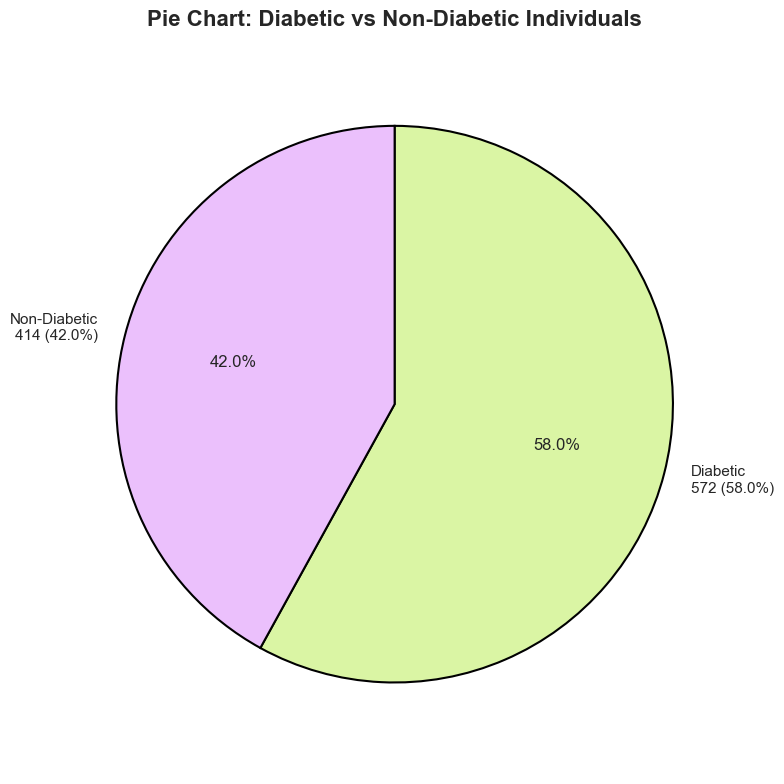

In [128]:
diabetes_counts = data1['Diabetes'].value_counts()

# Define the categories and respective counts
categories = ['Diabetic', 'Non-Diabetic']
values = diabetes_counts.values

# Colors for the pie chart
colors = ['#daf5a4', '#ebc0fc']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=[f'{category}\n{value} ({round(value/sum(values) * 100, 1)}%)' 
                        for category, value in zip(categories, values)], 
        colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

# Add title
plt.title('Pie Chart: Diabetic vs Non-Diabetic Individuals', fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that the pie chart is a circle
plt.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()

#### Blood Pressure Problems

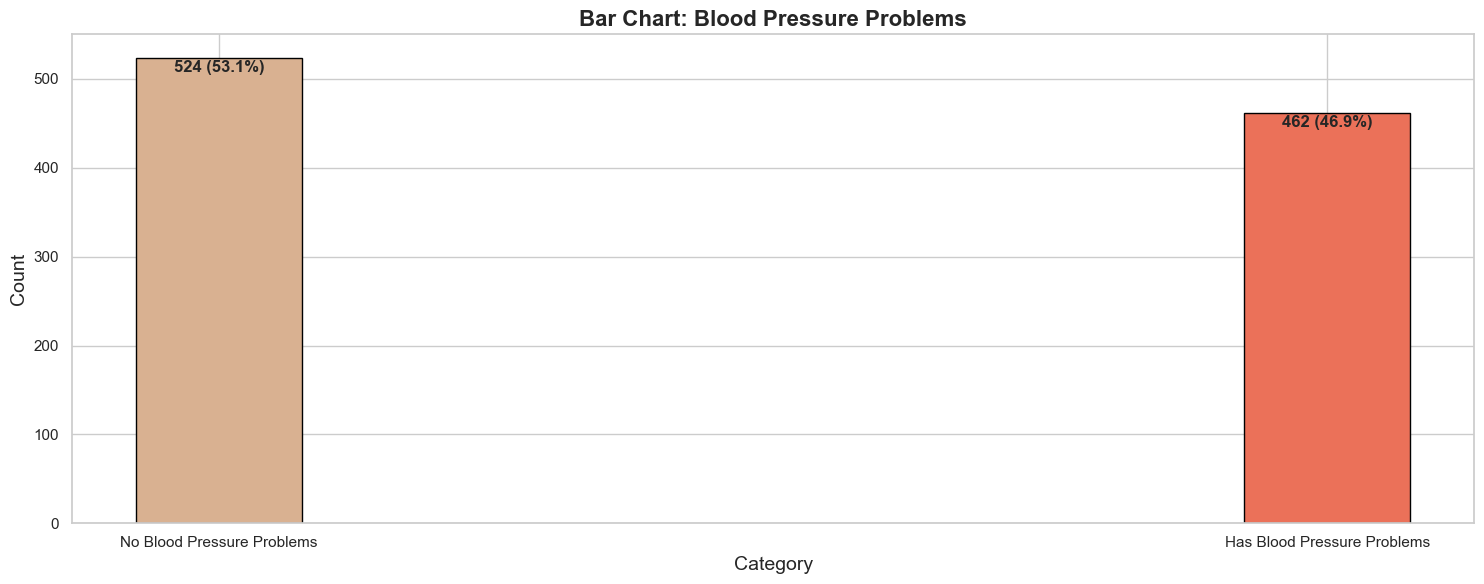

In [129]:
bp_counts = data1['BloodPressureProblems'].value_counts()



categories = ['No Blood Pressure Problems', 'Has Blood Pressure Problems']
values = bp_counts.values

plt.figure(figsize=(15, 6))
bars = plt.bar(categories, values, color=['#d9b191','#eb7159'], edgecolor='black',width=0.15)

plt.title('Bar Chart: Blood Pressure Problems', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add count labels on top of each bar
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 20,  
             f'{value} ({round(value/sum(values) * 100, 1)}%)', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

#### Any Transplant

In [130]:
data1.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [131]:
import plotly.express as px

# Count the values for 'AnyTransplants'
transplants_counts = data1['AnyTransplants'].value_counts()

categories = ['No Transplants', 'Has Transplants']
values = transplants_counts.values

percentages = (values / values.sum()) * 100


import pandas as pd
df = pd.DataFrame({
    'Category': ['AnyTransplants'] * len(categories),  # Parent category
    'Subcategory': categories,  
    'Count': values,  
    'Percentage': percentages  
})

# Create the Sunburst chart using Plotly
fig = px.sunburst(df, 
                  path=['Category', 'Subcategory'], 
                  values='Count',
                  color='Subcategory', 
                  color_discrete_map={'No Transplants': '#66b3ff', 'Has Transplants': '#ff9999'},
                  title='Sunburst Chart: Transplants Status',
                  custom_data=['Percentage'])

fig.update_traces(
    hovertemplate='<b>%{label}</b><br>Count: %{value}<br>Percentage: %{customdata[0]:.2f}%'
)


fig.update_layout(
    margin=dict(t=50, l=50, r=50, b=50),
    title_font_size=20
)

# Display the chart
fig.show()


In [132]:
data1.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

#### Any Chronic Diseases

In [133]:
import plotly.graph_objects as go

# Calculating the counts for each category 
category_counts = data1['AnyChronicDiseases'].value_counts()

fig = go.Figure(data=[go.Pie(labels=category_counts.index, 
                             values=category_counts.values, 
                             hole=.4,  
                             hoverinfo="label+percent", 
                             textinfo="label+value", 
                             textfont=dict(size=14),
                             marker=dict(colors=['#00e6e6', '#ff80bf'], 
                                         line=dict(color='#000000', width=2))
                             )])

fig.update_layout(
    title_text="Proportion of Individuals with Chronic Diseases",
    annotations=[dict(text='Chronic Diseases', x=0.5, y=0.5, font_size=12, showarrow=False)],
    showlegend=True
)

fig.show()


#### Family History of Cancer

In [134]:
import plotly.graph_objects as go

# Calculate the counts for each category in 'HistoryOfCancerInFamily'
category_counts = data1['HistoryOfCancerInFamily'].value_counts()

# Create the sunburst chart
fig = go.Figure(go.Sunburst(
    labels=category_counts.index,  # The unique categories
    parents=[''] * len(category_counts),  # No hierarchical parents, just a single level
    values=category_counts.values,  # The values (counts) for each category
    hoverinfo="label+value+percent entry",  # Correct hover info with valid flags
    marker=dict(colors=['#fdae61', '#3288bd'],  # Colors for the chart
                line=dict(color='#FFFFFF', width=2))  # Adds a white border
))

# Update the layout to make it look fancy
fig.update_layout(
    title_text="Distribution of Family History of Cancer",
    margin=dict(t=50, l=25, r=25, b=25),
    sunburstcolorway=['#ff7f0e', '#1f77b4'],
)

# Show the chart
fig.show()



#### Number of Major Surgeries

In [135]:
import plotly.graph_objects as go

# Calculate the counts for each category in 'NumberOfMajorSurgeries'
surgery_counts = data1['NumberOfMajorSurgeries'].value_counts()

# Create the funnel chart
fig = go.Figure(go.Funnel(
    y=surgery_counts.index,  # The categories for the surgeries
    x=surgery_counts.values,  # The counts of each category
    textinfo="value+percent initial",  # Display the count and percentage of total
    marker=dict(color=['#636EFA', '#EF553B', '#00CC96', '#AB63FA'])  # Custom colors
))

# Fancy layout options
fig.update_layout(
    title="Distribution of Number of Major Surgeries",
    funnelmode='stack',  # Stack the categories
    margin=dict(t=50, l=25, r=25, b=25)
)

# Show the chart
fig.show()


* **Dominant Category (0 Surgeries)**: The top level of the funnel represents patients who have had zero major surgeries, making up the majority with 479 records, which accounts for 100% when taken individually.

* **Decreasing Frequency**: Moving down the funnel, we see a decrease in the number of records:

    * 1 Surgery: 372 records, representing 78% of the remaining data.
    * 2 Surgeries: 119 records, or 25% of the remaining data.
    * 3 Surgeries: 16 records, making up the smallest portion at 3%.

* **Health Implications**: The skewed distribution towards zero surgeries might imply that the majority of the patients in the dataset have had minimal or no major surgeries, which could suggest a generally healthy population or limited surgical interventions among these individuals.

* **Targeted Health Interventions**: Patients with a higher number of surgeries (2 or 3) are relatively few. This could help focus healthcare management efforts on this smaller group, potentially identifying the underlying causes of multiple surgeries and planning targeted health interventions.

## Bivariate Analysis

### Categorical Columns

#### Premium Price and Number of Major Surgeries

In [136]:
import plotly.express as px

fig = px.box(
    data1, 
    x='NumberOfMajorSurgeries',  
    y='PremiumPrice',            
    points="all",                # Display all points (for more granularity)
    color='NumberOfMajorSurgeries',  # Add color differentiation for clarity
    title="Premium Price Distribution Across Number of Major Surgeries",
    labels={'NumberOfMajorSurgeries': 'Number of Major Surgeries', 'PremiumPrice': 'Premium Price'}
)

# Customize the layout for a fancy look
fig.update_layout(
    boxmode='group',  # Group boxes by category
    xaxis_title="Number of Major Surgeries",
    yaxis_title="Premium Price",
    showlegend=False
)

# Show the box plot
fig.show()


In [137]:
# Calculate average Premium Price per NumberOfMajorSurgeries category
surgery_avg_premium = data1.groupby('NumberOfMajorSurgeries')['PremiumPrice'].mean()

# Calculate overall average Premium Price
overall_avg_premium = data1['PremiumPrice'].mean()

print(f"Overall Average Premium Price: {overall_avg_premium:.2f}")
print(surgery_avg_premium)

Overall Average Premium Price: 24336.71
NumberOfMajorSurgeries
0    22968.684760
1    24741.935484
2    28084.033613
3    28000.000000
Name: PremiumPrice, dtype: float64


* 0 and 1 surgeries: These categories might have lower-than-average premium prices, possibly reflecting a lower perceived health risk.
* 2 and 3 surgeries: These categories may have prices closer to the overall average, suggesting that higher surgery counts do not significantly increase the premium beyond a certain point.

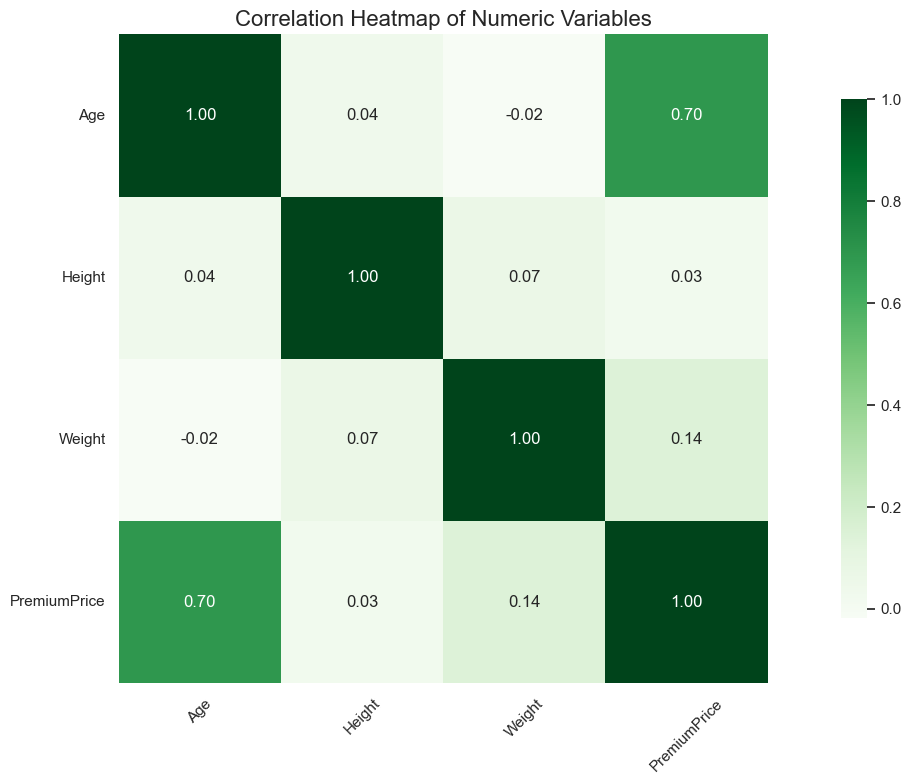

In [138]:

numeric_cols = ['Age', 'Height', 'Weight', 'PremiumPrice']
correlation_matrix = data1[numeric_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix, 
    annot=True,  
    cmap='Greens',  
    fmt=".2f",  
    square=True,  
    cbar_kws={"shrink": .8},  
)

# Add titles and labels
plt.title("Correlation Heatmap of Numeric Variables", fontsize=16)
plt.xticks(rotation=45) 
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()


* Age and Premium Price have the highest correlation.
* There is some positive correlation in Weight and Premium Price but it is weaker in nature.

## Hypothesis Testing

#### 1.Diabetes and Premium Price

##### Statistical Test Used: Independent T test

* H0: No significant difference in Premium Price based on Diabetes status.
* Ha: There is a significant difference in Premium Price based on Diabetes Status.

    * default p_value = 0.05 

In [139]:
data1['Diabetes'].value_counts()

Diabetes
non-diabetic    572
diabetic        414
Name: count, dtype: int64

In [140]:

from scipy import stats


group_non_diabetic = data1[data1['Diabetes'] == 'non-diabetic']['PremiumPrice']
group_diabetic = data1[data1['Diabetes'] == 'diabetic']['PremiumPrice']

# Performing T-test
t_stat, p_value = stats.ttest_ind(group_non_diabetic, group_diabetic)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in PremiumPrice based on Diabetes status.")
else:
    print("Fail to reject the null hypothesis: No significant difference in PremiumPrice based on Diabetes status.")


T-statistic: -2.3975629574233563, P-value: 0.016690091385306107
Reject the null hypothesis: There is a significant difference in PremiumPrice based on Diabetes status.


* From the T-test it can be inferred that there is a significant difference in PremiumPrice based on Diabetes status.

#### 2. Blood Pressure Problems and Premium Price

##### Statistical Test: T-test

* H0 :  No significant difference in PremiumPrice based on Blood Pressure status.
* Ha :  There is a significant difference in PremiumPrice based on Blood Pressure status.

In [141]:
group_no_bp_sampled = data1[data1['BloodPressureProblems'] == 'no-blood-pressure-problems'].sample(n=462, random_state=42)
group_has_bp_sampled = data1[data1['BloodPressureProblems'] == 'has-blood-pressure-problems']

# Extract 'PremiumPrice' for both groups
premium_no_bp = group_no_bp_sampled['PremiumPrice']
premium_has_bp = group_has_bp_sampled['PremiumPrice']

# Perform T-test
t_stat_bp, p_value_bp = stats.ttest_ind(premium_no_bp, premium_has_bp)

print(f"T-statistic (Blood Pressure): {t_stat_bp}, P-value: {p_value_bp}")

# Significance level
alpha = 0.05
if p_value_bp < alpha:
    print("Reject the null hypothesis: There is a significant difference in PremiumPrice based on Blood Pressure status.")
else:
    print("Fail to reject the null hypothesis: No significant difference in PremiumPrice based on Blood Pressure status.")

T-statistic (Blood Pressure): -5.211278864352897, P-value: 2.3147070792338766e-07
Reject the null hypothesis: There is a significant difference in PremiumPrice based on Blood Pressure status.


* There is a significant difference in PremiumPrice based on Blood Pressure status.

#### 3. Any Transplant and Premium Price

In [142]:
data1['AnyTransplants'].value_counts()

AnyTransplants
no-transplant     931
had-transplant     55
Name: count, dtype: int64

##### Statistical Test: Mann-Whitney U test

* H0 : No significant difference in Premium Prices based on Transplant history.
* Ha : There is a significant difference in Premium Prices based on Transplant history.

In [143]:
group_no_transplant = data1[data1['AnyTransplants'] == 'no-transplant']['PremiumPrice']
group_had_transplant = data1[data1['AnyTransplants'] == 'had-transplant']['PremiumPrice']

# Mann-Whitney U test
u_stat, p_value_mw = stats.mannwhitneyu(group_no_transplant, group_had_transplant)

# Output results for Mann-Whitney U test
print(f"Mann-Whitney U statistic: {u_stat}, P-value: {p_value_mw}")

# Significance level
alpha = 0.05
if p_value_mw < alpha:
    print("Reject the null hypothesis: The distributions of PremiumPrice are significantly different based on AnyTransplants status.")
else:
    print("Fail to reject the null hypothesis: The distributions of PremiumPrice are not significantly different based on AnyTransplants status.")


Mann-Whitney U statistic: 11814.0, P-value: 9.242204327996798e-12
Reject the null hypothesis: The distributions of PremiumPrice are significantly different based on AnyTransplants status.


* The distributions of PremiumPrice are significantly different based on AnyTransplants status.

### 4. Any Chronic Diseases and Premium Prices

##### Statistical Test: Mann-Whitney U Test

* H0 : No significant difference in Premium Prices based on Chronic Disease History.
* Ha : There is a significant difference in Premium Prices based on Chronic Disease History.

In [144]:
data1.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [145]:
data1['AnyChronicDiseases'].value_counts()

AnyChronicDiseases
no-chronic-disease     808
has-chronic-disease    178
Name: count, dtype: int64

In [146]:
group_no_chronic = data1[data1['AnyChronicDiseases'] == 'no-chronic-disease']['PremiumPrice']
group_has_chronic = data1[data1['AnyChronicDiseases'] == 'has-chronic-disease']['PremiumPrice']

# Mann-Whitney U test
u_stat, p_value_mw = stats.mannwhitneyu(group_no_chronic, group_has_chronic)

# Output results for Mann-Whitney U test
print(f"Mann-Whitney U statistic: {u_stat}, P-value: {p_value_mw}")

# Significance level
alpha = 0.05
if p_value_mw < alpha:
    print("Reject the null hypothesis: The distributions of PremiumPrice are significantly different based on AnyChronicDiseases status.")
else:
    print("Fail to reject the null hypothesis: The distributions of PremiumPrice are not significantly different based on AnyChronicDiseases status.")

Mann-Whitney U statistic: 49243.5, P-value: 2.261763976387707e-11
Reject the null hypothesis: The distributions of PremiumPrice are significantly different based on AnyChronicDiseases status.


* The distributions of PremiumPrice are significantly different based on AnyChronicDiseases status.

#### 5. Known Allergies and Premium Prices

In [147]:
data1['KnownAllergies'].value_counts()

KnownAllergies
no-allergies     774
has-allergies    212
Name: count, dtype: int64

##### Statistical Test:  T-test


* H0 : No significant difference in Premium Prices based on Known Allergies.
* Ha : There is a significant difference in Premium Prices based on Known Allergies.

In [148]:
group_no_allergies_sampled = data1[data1['KnownAllergies'] == 'no-allergies'].sample(n=212, random_state=42)


group_has_allergies = data1[data1['KnownAllergies'] == 'has-allergies']

premium_no_allergies = group_no_allergies_sampled['PremiumPrice']
premium_has_allergies = group_has_allergies['PremiumPrice']

# Perform T-test
t_stat, p_value = stats.ttest_ind(premium_no_allergies, premium_has_allergies)

# Output the T-test results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Set significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in PremiumPrice based on KnownAllergies status.")
else:
    print("Fail to reject the null hypothesis: No significant difference in PremiumPrice based on KnownAllergies status.")

T-statistic: -1.644426335501552, P-value: 0.10083285804760345
Fail to reject the null hypothesis: No significant difference in PremiumPrice based on KnownAllergies status.


* No significant difference in PremiumPrice based on KnownAllergies status.

### 6. Cancer History in Family and Premium Prices

#### Statistical Test : Mann-Whitney U Test

* H0 : No significant difference in PremiumPrice based on HistoryOfCancerInFamily status.
* H1 : There is a significant difference in PremiumPrice based on HistoryOfCancerInFamily status.

In [149]:
data1.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [150]:
data1['HistoryOfCancerInFamily'].value_counts()

HistoryOfCancerInFamily
no-cancer-history            870
family-has-cancer-history    116
Name: count, dtype: int64

In [151]:
group_no_cancer_history = data1[data1['HistoryOfCancerInFamily'] == 'no-cancer-history']['PremiumPrice']

group_cancer_history = data1[data1['HistoryOfCancerInFamily'] == 'family-has-cancer-history']['PremiumPrice']

# Perform Mann-Whitney U test
u_stat, p_value_mw = stats.mannwhitneyu(group_no_cancer_history, group_cancer_history)

# Output the Mann-Whitney U test results
print(f"Mann-Whitney U statistic: {u_stat}, P-value (Mann-Whitney U test): {p_value_mw}")

# Set significance level
alpha = 0.05
if p_value_mw < alpha:
    print("Reject the null hypothesis: There is a significant difference in PremiumPrice based on HistoryOfCancerInFamily status.")
else:
    print("Fail to reject the null hypothesis: No significant difference in PremiumPrice based on HistoryOfCancerInFamily status.")

Mann-Whitney U statistic: 39412.5, P-value (Mann-Whitney U test): 9.984681079750114e-05
Reject the null hypothesis: There is a significant difference in PremiumPrice based on HistoryOfCancerInFamily status.


* There is a significant difference in PremiumPrice based on HistoryOfCancerInFamily status

### 7. Number Of Major Surgeries and Premium Prices

#### Statistical Test : Kruskal Walis

* H0 : No significant difference in PremiumPrice based on NumberOfMajorSurgeries.
* H1 : There is a significant difference in PremiumPrice based on NumberOfMajorSurgeries.

In [152]:
group_0_surgeries = data1[data1['NumberOfMajorSurgeries'] == 0]['PremiumPrice']
group_1_surgeries = data1[data1['NumberOfMajorSurgeries'] == 1]['PremiumPrice']
group_2_surgeries = data1[data1['NumberOfMajorSurgeries'] == 2]['PremiumPrice']
group_3_surgeries = data1[data1['NumberOfMajorSurgeries'] == 3]['PremiumPrice']

# Perform Kruskal-Wallis H test
h_stat, p_value = stats.kruskal(group_0_surgeries, group_1_surgeries, group_2_surgeries, group_3_surgeries)

# Output the results
print(f"Kruskal-Wallis H statistic: {h_stat}, P-value: {p_value}")


alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in PremiumPrice based on NumberOfMajorSurgeries.")
else:
    print("Fail to reject the null hypothesis: No significant difference in PremiumPrice based on NumberOfMajorSurgeries.")

Kruskal-Wallis H statistic: 93.81277073618764, P-value: 3.3223412749827346e-20
Reject the null hypothesis: There is a significant difference in PremiumPrice based on NumberOfMajorSurgeries.


* There is a significant difference in PremiumPrice based on NumberOfMajorSurgeries.

## Feature Engineering

#### BMI

In [153]:
raw_data[['Height','Weight']]

,Height,Weight
0,155,57
1,180,73
2,158,59
3,183,93
4,166,88
...,...,...
981,169,67
982,153,70
983,155,71
984,158,73


In [154]:
raw_data['BMI'] = (raw_data['Weight']*(10**4)/(raw_data['Height']**2)).round(2)
raw_data['BMI']

0      23.73
1      22.53
2      23.63
3      27.77
4      31.93
       ...  
981    23.46
982    29.90
983    29.55
984    29.24
985    30.04
Name: BMI, Length: 986, dtype: float64

In [155]:
bmi_bins = [-float('inf'), 16, 17, 18.5, 25, 30, 35, 40, float('inf')]
bmi_labels = ['Severe Thinness', 'Moderate Thinness', 'Mild Thinness', 'Normal', 
              'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III']


raw_data['BMI_Category'] = pd.cut(raw_data['BMI'], bins=bmi_bins, labels=bmi_labels)

# Display the updated DataFrame
print(raw_data[['BMI', 'BMI_Category']].head())

     BMI   BMI_Category
0  23.73         Normal
1  22.53         Normal
2  23.63         Normal
3  27.77     Overweight
4  31.93  Obese Class I


In [156]:
import plotly.express as px

# Calculate the proportion of each BMI category
bmi_counts = raw_data['BMI_Category'].value_counts()

fig = px.pie(bmi_counts, 
             values=bmi_counts.values, 
             names=bmi_counts.index, 
             title='Proportion of BMI Categories',
             color_discrete_sequence=px.colors.sequential.RdBu,  # Customize color scheme
             hole=0.4)  # Create a donut-style chart

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True, title_x=0.5)


fig.show()

* Highest Number of Applicants belong to Overweight Category **(33.1%)**
* **(32.4%)** Applicants belong to Normal BMI category.


## Scaling the Data

In [157]:
data = raw_data.copy()

In [158]:
data.drop(['Height','Weight','BMI_Category'],axis = 1,inplace = True)

In [159]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'PremiumPrice', 'BMI'],
      dtype='object')

In [160]:
feature_columns = ['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 
                   'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 
                   'NumberOfMajorSurgeries', 'BMI']
target_column = 'PremiumPrice'

X = raw_data[feature_columns]
y = raw_data[target_column]

In [161]:
from sklearn.model_selection import train_test_split

# Performing the train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [162]:
import joblib
from sklearn.preprocessing import RobustScaler

# Initialized the RobustScaler
robust_scaler = RobustScaler()

# Fit the scaler on the training data and transform X_train
X_train_scaled = robust_scaler.fit_transform(X_train)

# Dumping the Parameters in Pickle file for Future
joblib.dump(robust_scaler, 'robust_scaler.pkl')

['robust_scaler.pkl']

In [163]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
0,-1.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-0.175202
1,-0.478261,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.815364
2,0.695652,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.025606
3,-0.478261,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.265499
4,-0.695652,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.269542


In [164]:
# Using the previously saved Scaler
robust_scaler = joblib.load('robust_scaler.pkl')

# Applying the scaler to X_test
X_test_scaled = robust_scaler.transform(X_test)


X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


In [165]:
X_test_scaled_df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,BMI
0,0.347826,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.505391
1,-0.130435,0.0,0.0,0.0,1.0,1.0,1.0,0.0,-0.777628
2,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.654987
3,-0.565217,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.707547
4,0.260870,1.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.219677


# Model Building

## Ensembling 

### Bagging : Random Forest Regressor

In [166]:
X_train_scaled_df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily',
       'NumberOfMajorSurgeries', 'BMI'],
      dtype='object')

In [167]:
from sklearn.ensemble import RandomForestRegressor

In [168]:
RF_regressor = RandomForestRegressor(
    n_estimators=100,
    criterion='squared_error',  # Mean squared error for regression
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0085,  # Same regularization parameter
    max_samples=None
)

In [169]:
# Fit the model
RF_regressor.fit(X_train_scaled_df, y_train)

RandomForestRegressor(ccp_alpha=0.0085, max_depth=10, max_features='sqrt')

#### Evaluating the Random Tree Regressor

In [170]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

##### Evaluating For Training Data

In [171]:
y_train_pred = RF_regressor.predict(X_train_scaled_df)
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

In [172]:
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

n_train = X_train_scaled_df.shape[0]
p_train = X_train_scaled_df.shape[1]
train_adjusted_r2 = adjusted_r2(train_r2, n_train, p_train)

print("Training Scores:")
print(f"R²: {train_r2:.4f}")
print(f"Adjusted R²: {train_adjusted_r2:.4f}")
print(f"Mean Squared Error: {train_mse:.4f}")
print(f"Mean Absolute Error: {train_mae:.4f}")


Training Scores:
R²: 0.9230
Adjusted R²: 0.9222
Mean Squared Error: 2929161.1349
Mean Absolute Error: 1002.3717


#### Evaluating For Testing Data

In [173]:
y_test_pred = RF_regressor.predict(X_test_scaled_df)
test_r2 = r2_score(y_test, y_test_pred)

In [174]:
n_test = X_test_scaled_df.shape[0]
p_test = X_test_scaled_df.shape[1]
test_adjusted_r2 = adjusted_r2(test_r2, n_test, p_test)

In [175]:
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

In [176]:
print("Test Scores:")
print(f"R²: {test_r2:.4f}")
print(f"Adjusted R²: {test_adjusted_r2:.4f}")
print(f"Mean Squared Error: {test_mse:.4f}")
print(f"Mean Absolute Error: {test_mae:.4f}")

Test Scores:
R²: 0.8400
Adjusted R²: 0.8323
Mean Squared Error: 6824948.7798
Mean Absolute Error: 1721.8205


* Adjusted R2 for test data = 0.8286 
* Adjusted R2 for training data = 0.9219
* From the evaluation it can be seen that the Model is **Overfitting**.

#### Using GridSearch CV for Hyperparameter Tuning

In [177]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider for the best split
    'ccp_alpha': [0.0, 0.0085, 0.01]  # Complexity parameter for pruning
}

RF_regressor = RandomForestRegressor(
    criterion='squared_error',  
    random_state=42
)

# Setting up GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(estimator=RF_regressor, 
                           param_grid=param_grid, 
                           scoring='r2',  
                           cv=10,  # 10-fold cross-validation
                           n_jobs=-1,  # Used all available processors
                           verbose=2)  # Showed progress during the process

# Fitting the GridSearchCV
grid_search.fit(X_train_scaled_df, y_train)

# Best Parameters and Best Scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_


print(f"Best hyperparameters: {best_params}")
print(f"Best cross-validated R² score: {best_score:.4f}")

Fitting 10 folds for each of 486 candidates, totalling 4860 fits
Best hyperparameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validated R² score: 0.7017


In [178]:
best_rf_model = grid_search.best_estimator_


best_rf_model.fit(X_train_scaled_df, y_train)


y_test_pred = best_rf_model.predict(X_test_scaled_df)

# Evaluate performance using R², MSE, MAE, and Adjusted R²
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R² score
test_r2 = r2_score(y_test, y_test_pred)

# Mean Squared Error and Mean Absolute Error
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Adjusted R²
n_test = X_test_scaled_df.shape[0]
p_test = X_test_scaled_df.shape[1]
test_adjusted_r2 = 1 - ((1 - test_r2) * (n_test - 1)) / (n_test - p_test - 1)

# Output test performance
print("Test Data Scores with Best Parameters:")
print(f"R²: {test_r2:.4f}")
print(f"Adjusted R²: {test_adjusted_r2:.4f}")
print(f"Mean Squared Error: {test_mse:.4f}")
print(f"Mean Absolute Error: {test_mae:.4f}")

Test Data Scores with Best Parameters:
R²: 0.8339
Adjusted R²: 0.8259
Mean Squared Error: 7084692.7988
Mean Absolute Error: 1832.0495


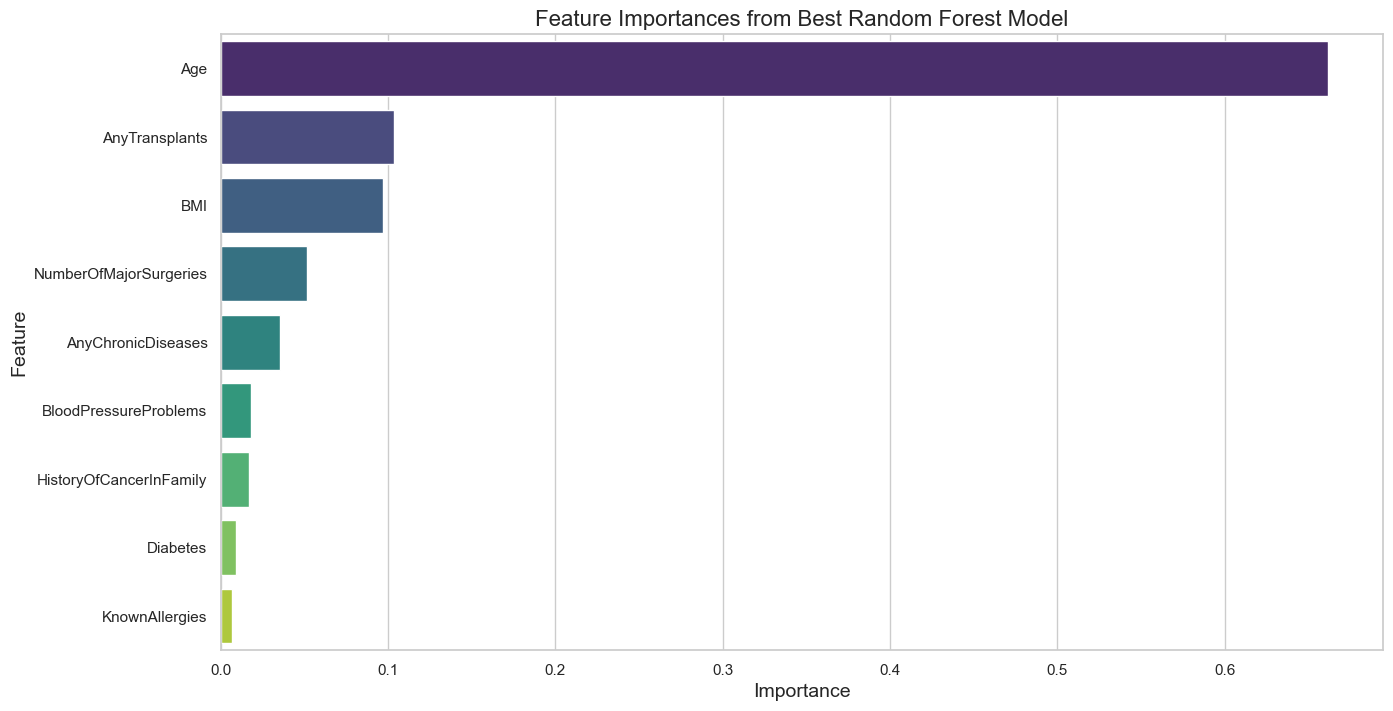

In [179]:
best_rf_model = grid_search.best_estimator_

# Extract feature importances from the best model
importances = best_rf_model.feature_importances_


feature_importances = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,  # Get feature names from the training DataFrame
    'Importance': importances
})

#Sorting features in descending order as per Importance value
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


sns.set(style="whitegrid")


plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')

# labels and title
plt.title('Feature Importances from Best Random Forest Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.show()

* RF Regressor has give highest weightage to Age while determining Premium Prices.
* From Statistical test as well as RF Regressor model it is evident that Known Allergies and Diabetes have lesser significance in determining the Premium Prices.

### Boosting

#### 1.GBDT Regressor

In [180]:
from sklearn.ensemble import GradientBoostingRegressor

In [181]:
gbdt_regressor = GradientBoostingRegressor(
    n_estimators=100,       # Number of boosting stages
    learning_rate=0.1,      # Step size shrinkage
    max_depth=3,            # Maximum depth of the individual trees
    random_state=42
)


In [182]:
gbdt_regressor.fit(X_train_scaled_df, y_train)

# Predicting y_test
y_test_pred = gbdt_regressor.predict(X_test_scaled_df)


In [183]:
# R² score for training data
train_r2 = r2_score(y_train, y_train_pred)

# Mean Squared Error and Mean Absolute Error for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Adjusted R² for training data
n_train = X_train_scaled_df.shape[0]  # Number of observations in the training set
p_train = X_train_scaled_df.shape[1]   # Number of features
train_adjusted_r2 = 1 - ((1 - train_r2) * (n_train - 1)) / (n_train - p_train - 1)

# Output performance metrics
print("Training Data Scores with GBDT:")
print(f"R²: {train_r2:.4f}")
print(f"Adjusted R²: {train_adjusted_r2:.4f}")
print(f"Mean Squared Error: {train_mse:.4f}")
print(f"Mean Absolute Error: {train_mae:.4f}")

Training Data Scores with GBDT:
R²: 0.9230
Adjusted R²: 0.9222
Mean Squared Error: 2929161.1349
Mean Absolute Error: 1002.3717


##### Evaluating Performance

In [184]:
# R² score
test_r2 = r2_score(y_test, y_test_pred)

# Mean Squared Error and Mean Absolute Error
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Adjusted R²
n_test = X_test_scaled_df.shape[0]  # Number of observations in the test set
p_test = X_test_scaled_df.shape[1]   # Number of features
test_adjusted_r2 = 1 - ((1 - test_r2) * (n_test - 1)) / (n_test - p_test - 1)

# Output test performance
print("Test Data Scores with GBDT:")
print(f"R²: {test_r2:.4f}")
print(f"Adjusted R²: {test_adjusted_r2:.4f}")
print(f"Mean Squared Error: {test_mse:.4f}")
print(f"Mean Absolute Error: {test_mae:.4f}")

Test Data Scores with GBDT:
R²: 0.8523
Adjusted R²: 0.8452
Mean Squared Error: 6299752.3652
Mean Absolute Error: 1692.2679


#### Hyper-Parameter Tuning

In [185]:
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 4, 5]             # Maximum depth of the individual trees
}

# Initialize the GridSearchCV object for the GBDT Regressor
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [186]:
grid_search.fit(X_train_scaled_df, y_train)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Best model
best_gbdt_regressor = grid_search.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [187]:
y_train_pred_best = best_gbdt_regressor.predict(X_train_scaled_df)
y_test_pred_best = best_gbdt_regressor.predict(X_test_scaled_df)

In [188]:
train_r2_best = r2_score(y_train, y_train_pred_best)


train_mse_best = mean_squared_error(y_train, y_train_pred_best)
train_mae_best = mean_absolute_error(y_train, y_train_pred_best)

# Adjusted R² for training data
n_train = X_train_scaled_df.shape[0]  # Number of observations in the training set
p_train = X_train_scaled_df.shape[1]   # Number of features
train_adjusted_r2_best = 1 - ((1 - train_r2_best) * (n_train - 1)) / (n_train - p_train - 1)

# R² score for test data
test_r2_best = r2_score(y_test, y_test_pred_best)

# Mean Squared Error and Mean Absolute Error for test data
test_mse_best = mean_squared_error(y_test, y_test_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)

# Adjusted R² for test data
n_test = X_test_scaled_df.shape[0]  # Number of observations in the test set
p_test = X_test_scaled_df.shape[1]   # Number of features
test_adjusted_r2_best = 1 - ((1 - test_r2_best) * (n_test - 1)) / (n_test - p_test - 1)

# Output performance metrics for the best model
print("\nTraining Data Scores with Best GBDT Model:")
print(f"R²: {train_r2_best:.4f}")
print(f"Adjusted R²: {train_adjusted_r2_best:.4f}")
print(f"Mean Squared Error: {train_mse_best:.4f}")
print(f"Mean Absolute Error: {train_mae_best:.4f}")

print("\nTest Data Scores with Best GBDT Model:")
print(f"R²: {test_r2_best:.4f}")
print(f"Adjusted R²: {test_adjusted_r2_best:.4f}")
print(f"Mean Squared Error: {test_mse_best:.4f}")
print(f"Mean Absolute Error: {test_mae_best:.4f}")


Training Data Scores with Best GBDT Model:
R²: 0.8049
Adjusted R²: 0.8026
Mean Squared Error: 7427642.1342
Mean Absolute Error: 1639.6614

Test Data Scores with Best GBDT Model:
R²: 0.8472
Adjusted R²: 0.8399
Mean Squared Error: 6514191.5660
Mean Absolute Error: 1779.4260


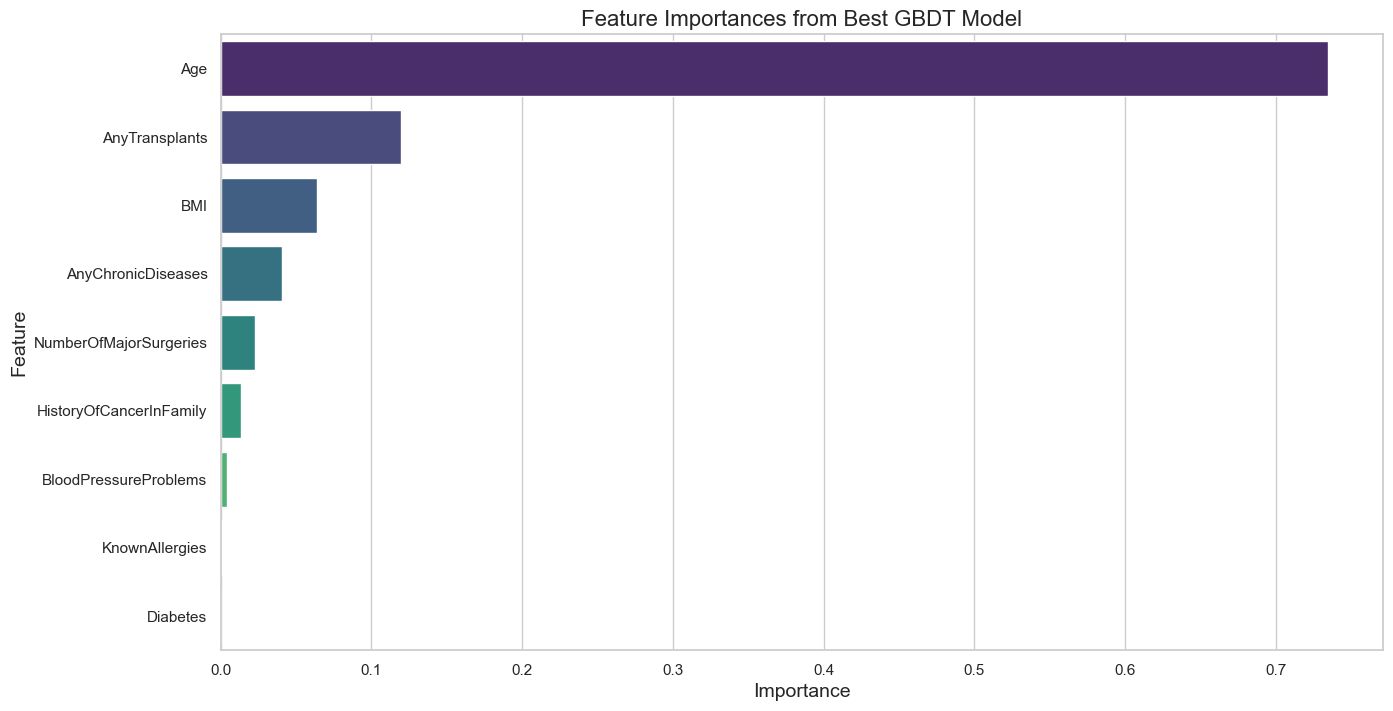

In [189]:
importances_best = best_gbdt_regressor.feature_importances_


feature_importances_best = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,  
    'Importance': importances_best
})

# Sorting features in decreasing order as per feature importance
feature_importances_best = feature_importances_best.sort_values(by='Importance', ascending=False)

# Set the plot style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_best, palette='viridis')

plt.title('Feature Importances from Best GBDT Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.show()


#### 2. XGBoosting

In [190]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


xgb_regressor = XGBRegressor(random_state=42)

#Fitting the Model
xgb_regressor.fit(X_train_scaled_df, y_train)

#Training the Model
y_train_pred_xgb = xgb_regressor.predict(X_train_scaled_df)

#Predicting y_test
y_test_pred_xgb = xgb_regressor.predict(X_test_scaled_df)

#Performance metrices
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)

# Adjusted R² for training data
n_train_xgb = X_train_scaled_df.shape[0]  # Number of observations in the training set
p_train_xgb = X_train_scaled_df.shape[1]   # Number of features
train_adjusted_r2_xgb = 1 - ((1 - train_r2_xgb) * (n_train_xgb - 1)) / (n_train_xgb - p_train_xgb - 1)


test_r2_xgb = r2_score(y_test, y_test_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

# Adjusted R² for test data
n_test_xgb = X_test_scaled_df.shape[0]  # Number of observations in the test set
p_test_xgb = X_test_scaled_df.shape[1]   # Number of features
test_adjusted_r2_xgb = 1 - ((1 - test_r2_xgb) * (n_test_xgb - 1)) / (n_test_xgb - p_test_xgb - 1)

# Output performance metrics for the initial model
print("\nInitial XGB Model Performance:")
print("Training Data Scores:")
print(f"R²: {train_r2_xgb:.4f}")
print(f"Adjusted R²: {train_adjusted_r2_xgb:.4f}")
print(f"Mean Squared Error: {train_mse_xgb:.4f}")
print(f"Mean Absolute Error: {train_mae_xgb:.4f}")

print("\nTest Data Scores:")
print(f"R²: {test_r2_xgb:.4f}")
print(f"Adjusted R²: {test_adjusted_r2_xgb:.4f}")
print(f"Mean Squared Error: {test_mse_xgb:.4f}")
print(f"Mean Absolute Error: {test_mae_xgb:.4f}")



Initial XGB Model Performance:
Training Data Scores:
R²: 0.9981
Adjusted R²: 0.9981
Mean Squared Error: 72782.4448
Mean Absolute Error: 169.3267

Test Data Scores:
R²: 0.8349
Adjusted R²: 0.8270
Mean Squared Error: 7041487.2236
Mean Absolute Error: 1656.5961


#### Hyper Parameter Tuning

In [191]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],   # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 4, 5],            # Maximum depth of the individual trees
    'subsample': [0.8, 1.0],           # Fraction of samples to be used for each tree
    'colsample_bytree': [0.8, 1.0]     # Fraction of features to be used for each tree
}


grid_search_xgb = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid_xgb,
    cv=5,
    n_jobs=-1,
    verbose=2
)


grid_search_xgb.fit(X_train_scaled_df, y_train)

# Best parameters found
print("Best parameters found: ", grid_search_xgb.best_params_)


best_xgb_regressor = grid_search_xgb.best_estimator_


y_train_pred_xgb = best_xgb_regressor.predict(X_train_scaled_df)
y_test_pred_xgb = best_xgb_regressor.predict(X_test_scaled_df)


train_r2_xgb = r2_score(y_train, y_train_pred_xgb)

# Mean Squared Error and Mean Absolute Error for training data
train_mse_xgb = mean_squared_error(y_train, y_train_pred_xgb)
train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)

# Adjusted R² for training data
n_train_xgb = X_train_scaled_df.shape[0]  # Number of observations in the training set
p_train_xgb = X_train_scaled_df.shape[1]   # Number of features
train_adjusted_r2_xgb = 1 - ((1 - train_r2_xgb) * (n_train_xgb - 1)) / (n_train_xgb - p_train_xgb - 1)

# R² score for test data
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

# Mean Squared Error and Mean Absolute Error for test data
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

# Adjusted R² for test data
n_test_xgb = X_test_scaled_df.shape[0]  # Number of observations in the test set
p_test_xgb = X_test_scaled_df.shape[1]   # Number of features
test_adjusted_r2_xgb = 1 - ((1 - test_r2_xgb) * (n_test_xgb - 1)) / (n_test_xgb - p_test_xgb - 1)

# Output performance metrics for the best model
print("\nTraining Data Scores with Best XGB Model:")
print(f"R²: {train_r2_xgb:.4f}")
print(f"Adjusted R²: {train_adjusted_r2_xgb:.4f}")
print(f"Mean Squared Error: {train_mse_xgb:.4f}")
print(f"Mean Absolute Error: {train_mae_xgb:.4f}")

print("\nTest Data Scores with Best XGB Model:")
print(f"R²: {test_r2_xgb:.4f}")
print(f"Adjusted R²: {test_adjusted_r2_xgb:.4f}")
print(f"Mean Squared Error: {test_mse_xgb:.4f}")
print(f"Mean Absolute Error: {test_mae_xgb:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

Training Data Scores with Best XGB Model:
R²: 0.7992
Adjusted R²: 0.7969
Mean Squared Error: 7641874.0231
Mean Absolute Error: 1669.1333

Test Data Scores with Best XGB Model:
R²: 0.8425
Adjusted R²: 0.8350
Mean Squared Error: 6715817.2625
Mean Absolute Error: 1787.7578


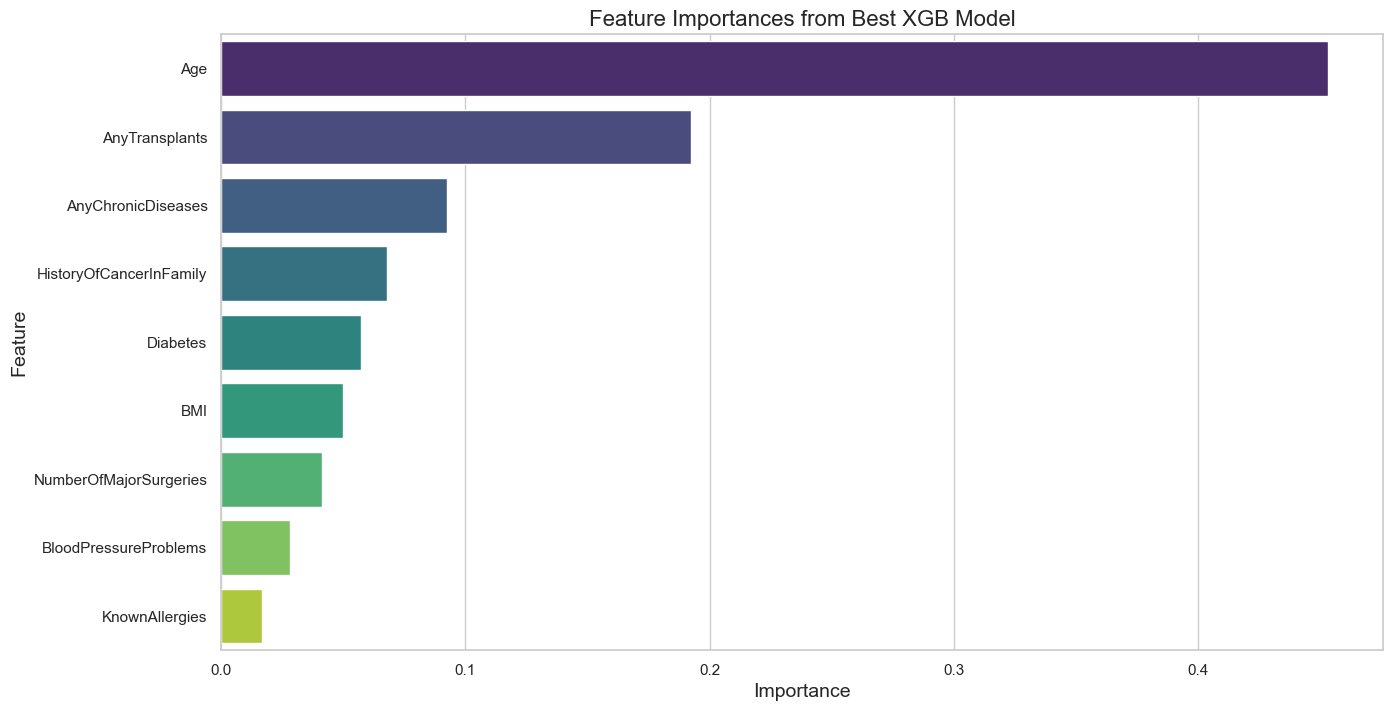

In [192]:

importances_xgb = best_xgb_regressor.feature_importances_

feature_importances_xgb = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,  # Get feature names from the training DataFrame
    'Importance': importances_xgb
})


feature_importances_xgb = feature_importances_xgb.sort_values(by='Importance', ascending=False)


sns.set(style="whitegrid")


plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_xgb, palette='viridis')

plt.title('Feature Importances from Best XGB Model', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Show the plot
plt.show()

### 4. Support Vector Regression

In [193]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [194]:
support_vector_regressor = SVR(kernel='rbf') # RBF kernel is used
support_vector_regressor.fit(X_train_scaled_df, y_train)

SVR()

In [195]:
y_pred_svr = support_vector_regressor.predict(X_test_scaled_df)

In [196]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)  # Root Mean Squared Error
r2_svr = r2_score(y_test, y_pred_svr)  # R² score

In [197]:
model_rmse = {}
model_r2 = {}
model_rmse['Support Vector Regression'] = round(rmse_svr, 3)
model_r2['Support Vector Regression'] = round(r2_svr, 3)

# Print the results
print(f'Root Mean Squared Error of the model is: {round(rmse_svr, 3)}')
print(f'R-squared value of the model is: {round(r2_svr, 3)}')

Root Mean Squared Error of the model is: 6682.288
R-squared value of the model is: -0.047


* R2 is less than 0 which means the model is under-performing.
* This model needs some hyperparameter tuning.

#### Hyperparameter Tuning (GridSearch CV)

In [198]:
from sklearn.model_selection import GridSearchCV

In [199]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 0.01, 0.1, 1],  # Kernel coefficient
    'epsilon': [0.1, 0.2, 0.5]  # Epsilon in the epsilon-SVR model
}

In [200]:
grid_search_svr = GridSearchCV(SVR(kernel='rbf'), param_grid, scoring='r2', cv=10, n_jobs=-1, verbose=2)
grid_search_svr.fit(X_train_scaled_df, y_train)

# Get the best parameters
best_params = grid_search_svr.best_params_
best_score = grid_search_svr.best_score_

# Print the best parameters and R² score
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated R² Score: {best_score:.4f}")

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best Parameters: {'C': 100, 'epsilon': 0.5, 'gamma': 'scale'}
Best Cross-Validated R² Score: 0.3335


In [201]:
best_svr_model = grid_search_svr.best_estimator_


best_svr_model.fit(X_train_scaled_df, y_train)

# Predicting test values
y_test_pred_svr = best_svr_model.predict(X_test_scaled_df)

# Calculate RMSE and R² for the test data
mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
rmse_test_svr = np.sqrt(mse_test_svr)
r2_test_svr = r2_score(y_test, y_test_pred_svr)

print(f'Final Test RMSE: {round(rmse_test_svr, 3)}')
print(f'Final Test R²: {round(r2_test_svr, 3)}')

Final Test RMSE: 5194.648
Final Test R²: 0.367


* SVR is not performing upto the mark.

## Model Evaluation

In [202]:
from tabulate import tabulate

performance_data = {
    'Model': ['Random Forest Regressor', 'GBDT', 'XGBoost', 'SVR'],
    'Training R²': [0.9228, 0.8049, 0.7992, '-'],
    'Training Adjusted R²': [0.9219, 0.8026, 0.7969, '-'],
    'Training MSE': [2937137.5346, 7427642.1342, 7641874.0231, '-'],
    'Training MAE': [1021.8255, 1639.6614, 1669.1333, '-'],
    'Test R²': [0.8339, 0.8472, 0.8425, 0.367],
    'Test Adjusted R²': [0.8259, 0.8399, 0.8350, '-'],
    'Test MSE': [7084692.7988, 6514191.5660, 6715817.2625, '-'],
    'Test MAE': [1832.0495, 1779.4260, 1787.7578, '-'],
    'Test RMSE': ['-', '-', '-', 5194.648]
}


performance_df = pd.DataFrame(performance_data)

print(tabulate(performance_df, headers='keys', tablefmt='pretty'))

+---+-------------------------+-------------+----------------------+--------------+--------------+---------+------------------+--------------+-----------+-----------+
|   |          Model          | Training R² | Training Adjusted R² | Training MSE | Training MAE | Test R² | Test Adjusted R² |   Test MSE   | Test MAE  | Test RMSE |
+---+-------------------------+-------------+----------------------+--------------+--------------+---------+------------------+--------------+-----------+-----------+
| 0 | Random Forest Regressor |   0.9228    |        0.9219        | 2937137.5346 |  1021.8255   | 0.8339  |      0.8259      | 7084692.7988 | 1832.0495 |     -     |
| 1 |          GBDT           |   0.8049    |        0.8026        | 7427642.1342 |  1639.6614   | 0.8472  |      0.8399      | 6514191.566  | 1779.426  |     -     |
| 2 |         XGBoost         |   0.7992    |        0.7969        | 7641874.0231 |  1669.1333   | 0.8425  |      0.835       | 6715817.2625 | 1787.7578 |     -     

* Adjusted R2 (test) is the highest for GBDT(0.8399)  
* This makes GBDT an obvious choice.

In [203]:
import joblib

# Saving the trained model
joblib.dump(best_gbdt_regressor, "best_gbdt_regressor.joblib")

['best_gbdt_regressor.joblib']